In [1]:
import numpy as np
import sys
sys.path.insert(1,'../../src')
from _generate_time_series import *
from _shear_frame import *
from utils_OB import *
from _clustering import *
import _tracking as tk
from utils_JK import *
import os

%load_ext autoreload
%autoreload 2

In [2]:
data_true = np.load('test_3_true.npz',allow_pickle=True)
true_w = data_true['arr_0']
true_phi = data_true['arr_1']

id_sort = np.argsort(true_w[0])
true_w_sorted = true_w[:,id_sort]
true_phi_sorted = true_phi[id_sort,:,:]
true_f_sorted = true_w_sorted/(2*np.pi)

result_average = np.load('result_average.npz', allow_pickle=True)['result_dict'].item()
result_linear_extrapolation = np.load('result_linear_extrapolation.npz', allow_pickle=True)['result_dict'].item()

In [3]:
savefig_dir_name = './result_figures/'
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(savefig_dir_name))

In [4]:
def plot_tracking_result(result_dict, true_f_sorted, n, m, d_track_threshold):
    fig, axs = plt.subplots(1,2, figsize = (20,10), tight_layout = True)
    ax_error = axs[1].twinx()
    n_modes = len(result_dict[n,m,d_track_threshold][3])
    error = []
    for i in range(n_modes):
        axs[0].scatter(result_dict[n,m,d_track_threshold][0][i], result_dict[n,m,d_track_threshold][1][i],label = 'Mode trace {}'.format(i+1))
        axs[0].plot(np.arange(0,true_f_sorted.shape[0]-n), true_f_sorted[n:,i])
        error.append(np.sum(result_dict[n,m,d_track_threshold][2][i]))
    axs[1].bar([1,2,3,4], result_dict[n,m,d_track_threshold][3],color = 'g',label='Number of skipped time segments')
    ax_error.bar([1,2,3,4], error, color = 'red', alpha = 0.5, label='Error sum')
    axs[1].set_xticks([1,2,3,4])
    axs[1].set_xlabel('Mode Trace')
    axs[0].set_xlabel('Time segment')
    axs[0].set_title('n = '+str(n)+', m = '+str(m)+', $d_{threshold} = $'+str(d_track_threshold), fontsize = 30)
    axs[0].legend()
    axs[1].legend(loc = 'upper left')
    ax_error.legend()
    plt.show()

TypeError: 'NoneType' object is not subscriptable

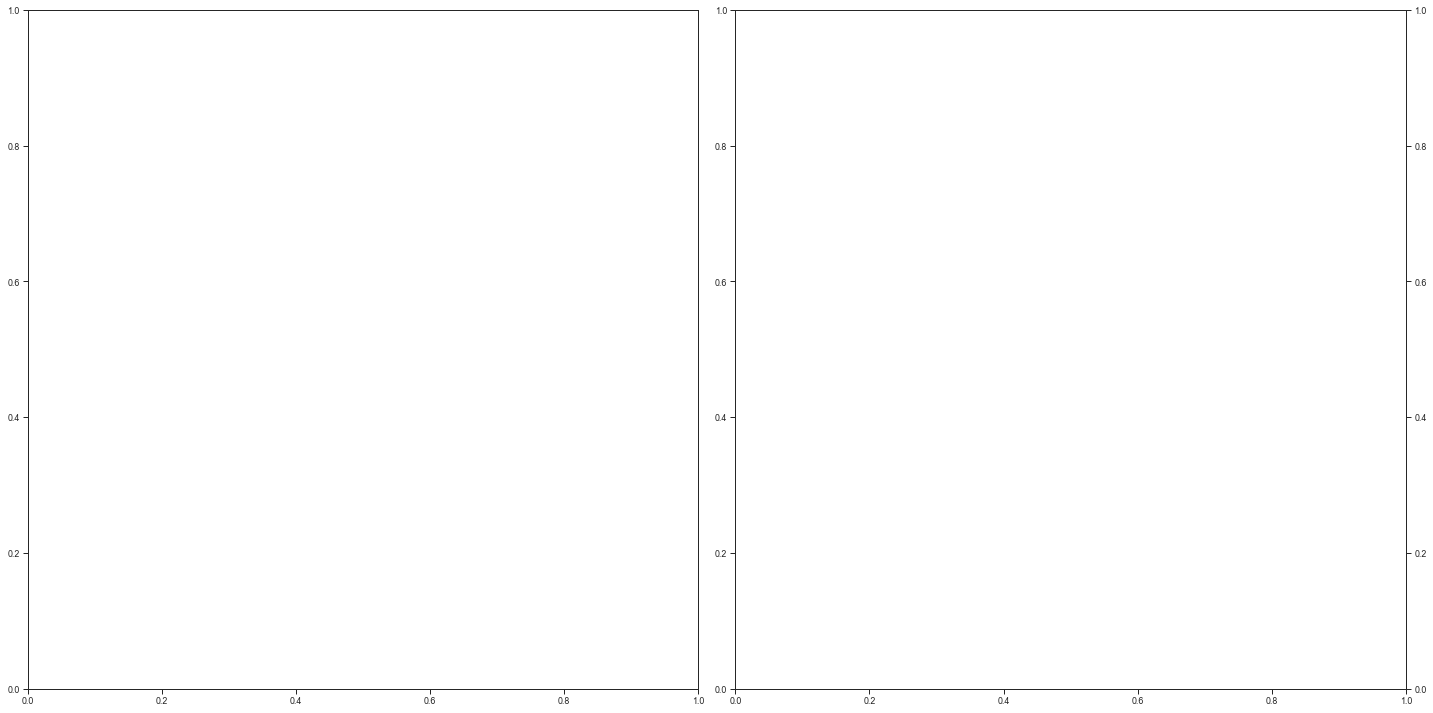

In [5]:
n = 30
m = 8
d_track_threshold = 0.05
plot_tracking_result(result_average, true_f_sorted, n, m, d_track_threshold)

In [6]:
n_test = np.array([20,25,30,35,40])
m_test = np.array([5,8,11,14,17,20,26,32])
d_track_threshold_test = np.array([0.010, 0.050, 0.075, 0.100, 0.200, 0.300, 0.350, 0.500, 0.800])

method = result_linear_extrapolation
method_str = 'Linear Extrapolation'

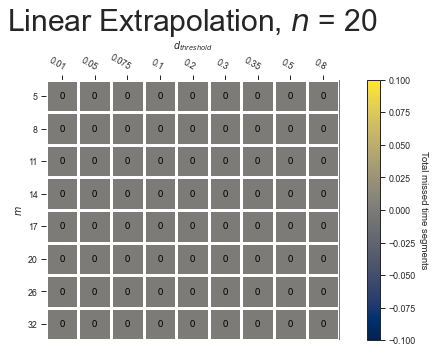

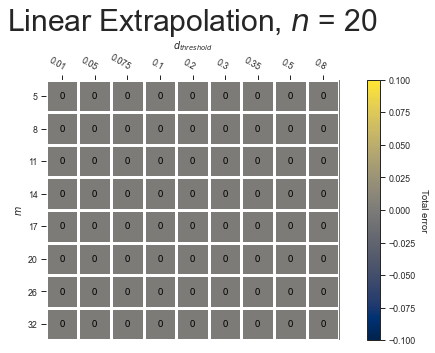

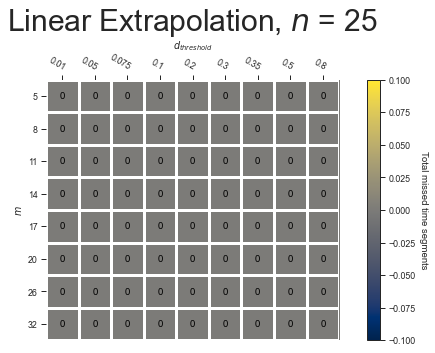

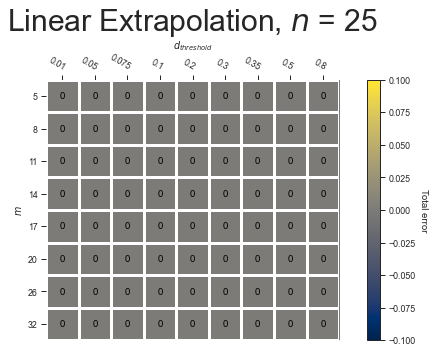

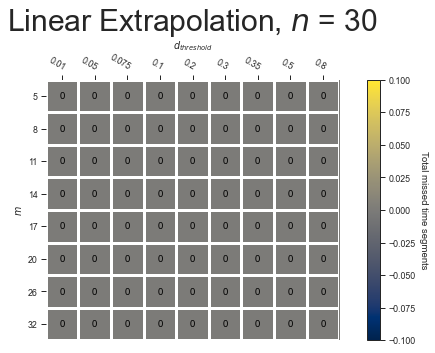

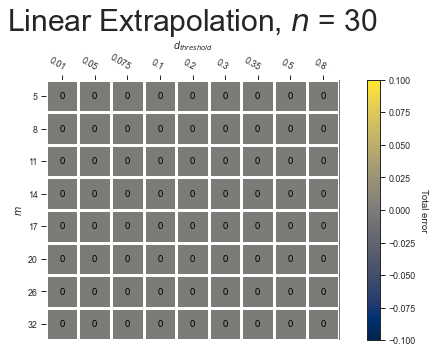

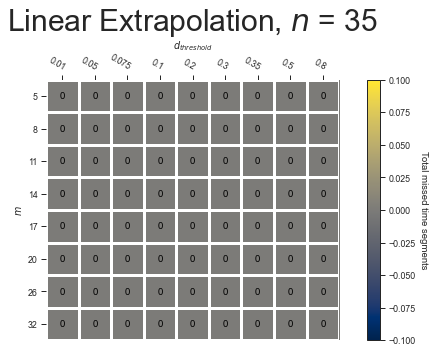

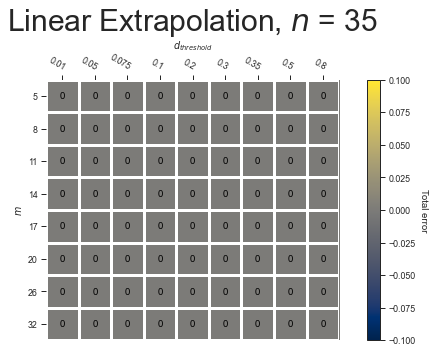

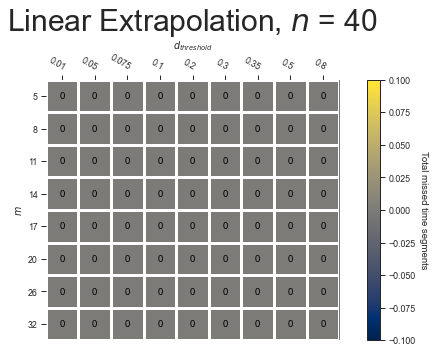

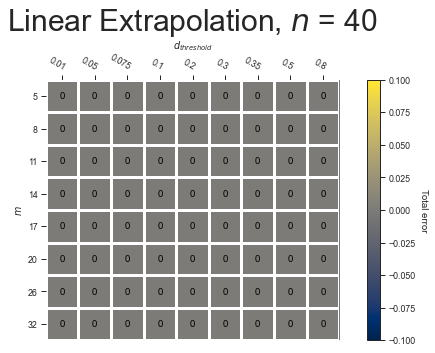

In [7]:
for n_plot in n_test:
    error_tot = np.zeros((m_test.shape[0], d_track_threshold_test.shape[0]))
    n_missed_tot = np.zeros((m_test.shape[0], d_track_threshold_test.shape[0]))
    for i, mi in enumerate(m_test):
        for j, d_track_threshold_j in enumerate(d_track_threshold_test):
            if method[n_plot, mi, d_track_threshold_j] == None:
                continue
            else:
                error_ij = method[n_plot, mi, d_track_threshold_j][2]
                n_missed_ij = method[n_plot, mi, d_track_threshold_j][-1]
                n_missed_tot[i,j] += np.sum(n_missed_ij)
                for error in error_ij:
                    error_tot[i,j] += np.sum(error)

    im_temp1,fig_temp1 = plot_result_heatmap(n_missed_tot, m_test, d_track_threshold_test, method_str+', $n$ = '+str(n_plot), metric_title = 'Total missed time segments', n_decimalpoints='0')
    im_temp2,fig_temp2 = plot_result_heatmap(error_tot, m_test, d_track_threshold_test, method_str+', $n$ = '+str(n_plot), metric_title = 'Total error', n_decimalpoints='3')

    # fig_temp1.savefig(method_str+', n = '+str(n_plot)+', missed segments')
    # fig_temp2.savefig(method_str+', n = '+str(n_plot)+', error')